# Problem 3 Part 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the data
car_truck = pd.read_csv('ECI256_NGSIM/car_truck data/ECI256_I80_Car_Following_Car-Truck_trajectory.csv')
truck_car = pd.read_csv('ECI256_NGSIM/car_truck data/ECI256_I80_Car_Following_Truck-Car_trajectory.csv')

In [3]:
# Make new index that combines vehicle ID and Frame_ID
car_truck['ID'] = [str(x) + ',' + str(y) for x, y in zip(car_truck['Vehicle_ID'], car_truck['Frame_ID'])]
truck_car['ID'] = [str(x) + ',' + str(y) for x, y in zip(truck_car['Vehicle_ID'], truck_car['Frame_ID'])]

## CMC Speeds

In [4]:
# Separate the relevant cars and trucks in each dataset
car_truck_CMC = car_truck[car_truck['v_Class'] == 2]
truck_car_CMC = truck_car[truck_car['v_Class'] == 3]

# Calculate CMC Speeds
car_truck_tau = 1.2
truck_car_tau = 2.0

car_truck_CMC['CMC Speed'] = (car_truck_CMC['Space_Headway'] - car_truck_CMC['v_length']) / car_truck_tau
truck_car_CMC['CMC Speed'] = (truck_car_CMC['Space_Headway'] - truck_car_CMC['v_length']) / truck_car_tau

C:\Users\matth\AppData\Local\Temp\ipykernel_34224\1459841026.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_truck_CMC['CMC Speed'] = (car_truck_CMC['Space_Headway'] - car_truck_CMC['v_length']) / car_truck_tau
C:\Users\matth\AppData\Local\Temp\ipykernel_34224\1459841026.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truck_car_CMC['CMC Speed'] = (truck_car_CMC['Space_Headway'] - truck_car_CMC['v_length']) / truck_car_tau


In [5]:
# Calculate CMC mean square error
car_truck_CMC['CMC Square Error'] = (car_truck_CMC['CMC Speed'] - car_truck_CMC['v_Vel']) * (car_truck_CMC['CMC Speed'] - car_truck_CMC['v_Vel'])
truck_car_CMC['CMC Square Error'] = (truck_car_CMC['CMC Speed'] - truck_car_CMC['v_Vel']) * (truck_car_CMC['CMC Speed'] - truck_car_CMC['v_Vel'])

car_truck_mean_square_error = car_truck_CMC['CMC Square Error'].mean()
truck_car_mean_square_error = truck_car_CMC['CMC Square Error'].mean()

print(car_truck_mean_square_error, truck_car_mean_square_error)
display(car_truck_CMC, truck_car_CMC)

2129.5561397800307 283.89994307232274


C:\Users\matth\AppData\Local\Temp\ipykernel_34224\2996898332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_truck_CMC['CMC Square Error'] = (car_truck_CMC['CMC Speed'] - car_truck_CMC['v_Vel']) * (car_truck_CMC['CMC Speed'] - car_truck_CMC['v_Vel'])
C:\Users\matth\AppData\Local\Temp\ipykernel_34224\2996898332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truck_car_CMC['CMC Square Error'] = (truck_car_CMC['CMC Speed'] - truck_car_CMC['v_Vel']) * (truck_car_CMC['CMC Speed'] - truck_car_CMC['v_V

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location,ID,CMC Speed,CMC Square Error
0,705,3208,352,1113437885700,6.367,63.046,6042829.822,2133131.060,14.4,5.9,...,NaN,NaN,691,0,88.21,2.50,i-80,"705,3208",61.508333,687.925469
1,705,3209,352,1113437885800,6.375,67.063,6042829.329,2133135.030,14.4,5.9,...,NaN,NaN,691,0,87.82,2.49,i-80,"705,3209",61.183333,670.982678
2,705,3210,352,1113437885900,6.375,69.062,6042829.083,2133137.014,14.4,5.9,...,NaN,NaN,691,0,89.44,2.54,i-80,"705,3210",62.533333,742.744178
3,705,3211,352,1113437886000,6.374,74.062,6042828.467,2133141.976,14.4,5.9,...,NaN,NaN,691,0,88.07,2.50,i-80,"705,3211",61.391667,681.819136
4,705,3212,352,1113437886100,6.373,78.562,6042827.913,2133146.442,14.4,5.9,...,NaN,NaN,691,0,87.18,2.47,i-80,"705,3212",60.650000,643.636900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47800,2917,8627,1069,1113433997600,67.235,1542.093,6042683.975,2134605.357,14.3,6.9,...,NaN,NaN,2899,2916,90.23,4.91,i-80,"2917,8627",63.275000,2017.357225
47801,2917,8628,1069,1113433997700,67.241,1543.928,6042683.690,2134607.167,14.3,6.9,...,NaN,NaN,2899,2916,89.91,4.91,i-80,"2917,8628",63.008333,1996.153469
47802,2917,8629,1069,1113433997800,67.248,1545.761,6042683.406,2134608.977,14.3,6.9,...,NaN,NaN,2899,2916,90.27,4.92,i-80,"2917,8629",63.308333,2023.050469
47803,2917,8630,1069,1113433997900,67.253,1547.594,6042683.121,2134610.788,14.3,6.9,...,NaN,NaN,2899,2916,90.93,4.96,i-80,"2917,8630",63.858333,2073.739803


,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location,ID,CMC Speed,CMC Square Error
0,2143,8693,413,1113438434200,4.127,72.062,6042826.483,2133139.715,23.3,8.5,...,NaN,NaN,2140,0,74.99,2.23,i-80,"2143,8693",25.845,59.830225
1,2143,8694,413,1113438434300,4.126,75.563,6042826.052,2133143.189,23.3,8.5,...,NaN,NaN,2140,0,75.00,2.23,i-80,"2143,8694",25.850,59.752900
2,2143,8695,413,1113438434400,4.126,78.063,6042825.744,2133145.670,23.3,8.5,...,NaN,NaN,2140,0,76.00,2.26,i-80,"2143,8695",26.350,52.272900
3,2143,8696,413,1113438434500,4.125,81.062,6042825.375,2133148.647,23.3,8.5,...,NaN,NaN,2140,0,76.55,2.28,i-80,"2143,8696",26.625,48.372025
4,2143,8697,413,1113438434600,4.124,84.062,6042825.005,2133151.624,23.3,8.5,...,NaN,NaN,2140,0,77.17,2.30,i-80,"2143,8697",26.935,44.156025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34418,1374,4502,450,1113433585100,63.867,1597.913,6042671.799,2134659.935,26.3,8.5,...,NaN,NaN,1368,1379,27.15,0.83,i-80,"1374,4502",0.425,1050.084025
34419,1374,4503,450,1113433585200,63.877,1601.197,6042671.288,2134663.178,26.3,8.5,...,NaN,NaN,1368,1379,27.50,0.84,i-80,"1374,4503",0.600,1038.772900
34420,1374,4504,450,1113433585300,63.886,1604.480,6042670.777,2134666.421,26.3,8.5,...,NaN,NaN,1368,1379,27.85,0.85,i-80,"1374,4504",0.775,1027.523025
34421,1374,4505,450,1113433585400,63.896,1607.764,6042670.266,2134669.665,26.3,8.5,...,NaN,NaN,1368,1379,28.20,0.86,i-80,"1374,4505",0.950,1016.334400


## GM Speeds

### Part 1: Car Following a Truck

In [6]:
# Separate the cars and trucks in the dataset
cars_1 = car_truck[car_truck['v_Class'] == 2]
trucks_1 = car_truck[car_truck['v_Class'] == 3]

# Append preceding index to cars df and add preceding truck speeds to that df
cars_1['Preceding Index'] = [str(x) + ',' + str(y) for x, y in zip(cars_1['Preceding'], cars_1['Frame_ID'])]
cars_1 = pd.merge(left = cars_1, right = trucks_1[['ID','v_Vel']], left_on = 'Preceding Index', right_on = 'ID', how = 'left')

# Iterate through the df to calculate GM speeds for each car
new_speeds = []

for Vehicle_ID in cars_1['Vehicle_ID'].unique():
    vehicle_data = cars_1[cars_1['Vehicle_ID'] == Vehicle_ID]
    preceding_speeds = vehicle_data['v_Vel_y'].to_list()
    current_speed = vehicle_data['v_Vel_x'].iloc[0]
    current_spacing = vehicle_data['Space_Headway'].iloc[0]
    new_speeds = new_speeds + [current_speed]
    
    for i in range(len(cars_1[cars_1['Vehicle_ID'] == Vehicle_ID]) - 1):
        # Calculate the new speed
        velocity = current_speed
        preceding_velocity = preceding_speeds[i]
        spacing = current_spacing
        acceleration = (1 / car_truck_tau) * ((preceding_speeds[i] - current_speed)/(current_spacing))
        new_speed = current_speed + 0.1 * acceleration
        new_speeds = new_speeds + [new_speed]
        
        # Update the new spacing and new speed
        current_spacing = current_spacing + 0.1 * (preceding_speeds[i] - current_speed)
        current_speed = new_speed
        
# Add the new speeds to the df
cars_1['GM Speed'] = new_speeds

C:\Users\matth\AppData\Local\Temp\ipykernel_34224\2181227102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_1['Preceding Index'] = [str(x) + ',' + str(y) for x, y in zip(cars_1['Preceding'], cars_1['Frame_ID'])]


In [7]:
# Calculate GM mean square error
cars_1['GM Square Error'] = (cars_1['GM Speed'] - cars_1['v_Vel_x']) * (cars_1['GM Speed'] - cars_1['v_Vel_x'])
car_truck_GM_mean_square_error = cars_1['GM Square Error'].mean()

print(car_truck_GM_mean_square_error)
display(cars_1)

335.2180147263787


,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,Following,Space_Headway,Time_Headway,Location,ID_x,Preceding Index,ID_y,v_Vel_y,GM Speed,GM Square Error
0,705,3208,352,1113437885700,6.367,63.046,6042829.822,2133131.060,14.4,5.9,...,0,88.21,2.50,i-80,"705,3208","691,3208","691,3208",36.25,35.280000,0.000000e+00
1,705,3209,352,1113437885800,6.375,67.063,6042829.329,2133135.030,14.4,5.9,...,0,87.82,2.49,i-80,"705,3209","691,3209","691,3209",36.25,35.280916,8.397410e-07
2,705,3210,352,1113437885900,6.375,69.062,6042829.083,2133137.014,14.4,5.9,...,0,89.44,2.54,i-80,"705,3210","691,3210","691,3210",36.25,35.281831,3.352108e-06
3,705,3211,352,1113437886000,6.374,74.062,6042828.467,2133141.976,14.4,5.9,...,0,88.07,2.50,i-80,"705,3211","691,3211","691,3211",36.22,35.282744,7.526870e-06
4,705,3212,352,1113437886100,6.373,78.562,6042827.913,2133146.442,14.4,5.9,...,0,87.18,2.47,i-80,"705,3212","691,3212","691,3212",36.23,35.283626,1.314821e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24056,2917,8627,1069,1113433997600,67.235,1542.093,6042683.975,2134605.357,14.3,6.9,...,2916,90.23,4.91,i-80,"2917,8627","2899,8627","2899,8627",17.65,18.134359,5.091366e-02
24057,2917,8628,1069,1113433997700,67.241,1543.928,6042683.690,2134607.167,14.3,6.9,...,2916,89.91,4.91,i-80,"2917,8628","2899,8628","2899,8628",22.12,18.134201,3.833723e-02
24058,2917,8629,1069,1113433997800,67.248,1545.761,6042683.406,2134608.977,14.3,6.9,...,2916,90.27,4.92,i-80,"2917,8629","2899,8629","2899,8629",22.12,18.135505,3.782836e-02
24059,2917,8630,1069,1113433997900,67.253,1547.594,6042683.121,2134610.788,14.3,6.9,...,2916,90.93,4.96,i-80,"2917,8630","2899,8630","2899,8630",22.12,18.136806,3.355996e-02


### Part 2: Truck Following a Car

In [8]:
# Separate the cars and trucks in the dataset
cars_2 = truck_car[truck_car['v_Class'] == 2]
trucks_2 = truck_car[truck_car['v_Class'] == 3]

# Append preceding index to trucks df and add preceding car speeds to that df
trucks_2['Preceding Index'] = [str(x) + ',' + str(y) for x, y in zip(trucks_2['Preceding'], trucks_2['Frame_ID'])]
trucks_2 = pd.merge(left = trucks_2, right = cars_2[['ID','v_Vel']], left_on = 'Preceding Index', right_on = 'ID', how = 'left')

# Iterate through the df to calculate GM speeds for each truck
new_speeds = []

for Vehicle_ID in trucks_2['Vehicle_ID'].unique():
    vehicle_data = trucks_2[trucks_2['Vehicle_ID'] == Vehicle_ID]
    preceding_speeds = vehicle_data['v_Vel_y'].to_list()
    current_speed = vehicle_data['v_Vel_x'].iloc[0]
    current_spacing = vehicle_data['Space_Headway'].iloc[0]
    new_speeds = new_speeds + [current_speed]
    
    for i in range(len(trucks_2[trucks_2['Vehicle_ID'] == Vehicle_ID]) - 1):
        # Calculate the new speed
        velocity = current_speed
        preceding_velocity = preceding_speeds[i]
        spacing = current_spacing
        acceleration = (1 / truck_car_tau) * ((preceding_speeds[i] - current_speed)/(current_spacing))
        new_speed = current_speed + 0.1 * acceleration
        new_speeds = new_speeds + [new_speed]
        
        # Update the new spacing and new speed
        current_spacing = current_spacing + 0.1 * (preceding_speeds[i] - current_speed)
        current_speed = new_speed
        
# Add the new speeds to the df
trucks_2['GM Speed'] = new_speeds

C:\Users\matth\AppData\Local\Temp\ipykernel_34224\3204793559.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trucks_2['Preceding Index'] = [str(x) + ',' + str(y) for x, y in zip(trucks_2['Preceding'], trucks_2['Frame_ID'])]


In [9]:
# Calculate GM mean square error
trucks_2['GM Square Error'] = (trucks_2['GM Speed'] - trucks_2['v_Vel_x']) * (trucks_2['GM Speed'] - trucks_2['v_Vel_x'])
truck_car_GM_mean_square_error = trucks_2['GM Square Error'].mean()

print(truck_car_GM_mean_square_error)
display(trucks_2)

126.27488552655251


,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,Following,Space_Headway,Time_Headway,Location,ID_x,Preceding Index,ID_y,v_Vel_y,GM Speed,GM Square Error
0,2143,8693,413,1113438434200,4.127,72.062,6042826.483,2133139.715,23.3,8.5,...,0,74.99,2.23,i-80,"2143,8693","2140,8693","2140,8693",35.35,33.580000,0.000000
1,2143,8694,413,1113438434300,4.126,75.563,6042826.052,2133143.189,23.3,8.5,...,0,75.00,2.23,i-80,"2143,8694","2140,8694","2140,8694",35.26,33.581180,0.000001
2,2143,8695,413,1113438434400,4.126,78.063,6042825.744,2133145.670,23.3,8.5,...,0,76.00,2.26,i-80,"2143,8695","2140,8695","2140,8695",35.41,33.582297,0.000005
3,2143,8696,413,1113438434500,4.125,81.062,6042825.375,2133148.647,23.3,8.5,...,0,76.55,2.28,i-80,"2143,8696","2140,8696","2140,8696",35.78,33.583510,0.000012
4,2143,8697,413,1113438434600,4.124,84.062,6042825.005,2133151.624,23.3,8.5,...,0,77.17,2.30,i-80,"2143,8697","2140,8697","2140,8697",36.11,33.584964,0.000025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17389,1374,4502,450,1113433585100,63.867,1597.913,6042671.799,2134659.935,26.3,8.5,...,1379,27.15,0.83,i-80,"1374,4502","1368,4502","1368,4502",36.32,41.905140,82.358159
17390,1374,4503,450,1113433585200,63.877,1601.197,6042671.288,2134663.178,26.3,8.5,...,1379,27.50,0.84,i-80,"1374,4503","1368,4503","1368,4503",36.32,41.905682,82.367996
17391,1374,4504,450,1113433585300,63.886,1604.480,6042670.777,2134666.421,26.3,8.5,...,1379,27.85,0.85,i-80,"1374,4504","1368,4504","1368,4504",36.32,41.906223,82.377823
17392,1374,4505,450,1113433585400,63.896,1607.764,6042670.266,2134669.665,26.3,8.5,...,1379,28.20,0.86,i-80,"1374,4505","1368,4505","1368,4505",36.32,41.906764,82.387642


## Plotting the Speeds

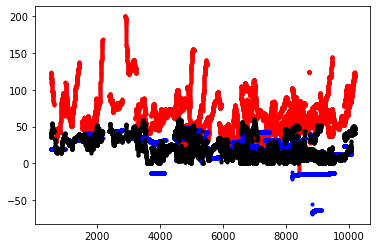

In [14]:
# Plot for car following a truck
car_truck_frames = car_truck_CMC['Frame_ID']
car_truck_observed_speeds = car_truck_CMC['v_Vel']
car_truck_CMC_speeds = car_truck_CMC['CMC Speed']
car_truck_GM_speeds = cars_1['GM Speed']

plt.plot(car_truck_frames, car_truck_CMC_speeds, '.', color='red')
plt.plot(car_truck_frames, car_truck_GM_speeds, '.', color='blue')
plt.plot(car_truck_frames, car_truck_observed_speeds, '.', color='black')

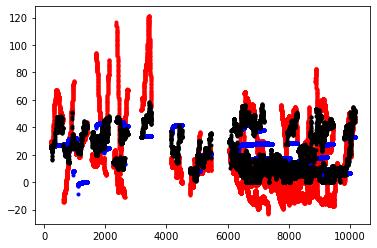

In [15]:
# Plot for truck following a car
truck_car_frames = truck_car_CMC['Frame_ID']
truck_car_observed_speeds = truck_car_CMC['v_Vel']
truck_car_CMC_speeds = truck_car_CMC['CMC Speed']
truck_car_GM_speeds = trucks_2['GM Speed']

plt.plot(truck_car_frames, truck_car_CMC_speeds, '.', color='red')
plt.plot(truck_car_frames, truck_car_GM_speeds, '.', color='blue')
plt.plot(truck_car_frames, truck_car_observed_speeds, '.', color='black')